## EDA - Jesse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns',None)

#### Our teammates first went through the categorical features and removed some outliers to start cleaning the data.

In [170]:
housing = pd.read_csv('Ames_Housing_Price_Data_CLEAN.csv', index_col=0)
print(housing.shape)
housing.head()

(2553, 81)


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,907250050,2000,305900,20,RL,80.0,10386,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464.0,Unf,0.0,536.0,2000.0,GasA,Ex,Y,SBrkr,2000,0,0,1.0,0.0,2,0,3,1,Gd,8,Typ,0,NaN,Attchd,2004.0,Fin,3.0,888.0,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,909425140,1839,257500,20,RL,110.0,14442,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,7,1957,2004,Hip,CompShg,CemntBd,CmentBd,BrkFace,106.0,TA,TA,PConc,TA,TA,No,GLQ,1186.0,Unf,0.0,291.0,1477.0,GasA,Ex,Y,SBrkr,1839,0,0,1.0,0.0,2,0,3,1,Gd,7,Typ,2,TA,Attchd,1957.0,Fin,2.0,416.0,TA,TA,Y,0,87,0,0,200,0,NaN,NaN,NaN,0,6,2007,WD,Normal


#### We decided to look at SalePrice Per Gross Living Area as new feature.

In [171]:
housing["SalePricePerGLA"] = housing['SalePrice']/housing['GrLivArea']

In [106]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 1 to 1000
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2553 non-null   int64  
 1   GrLivArea        2553 non-null   int64  
 2   SalePrice        2553 non-null   int64  
 3   MSSubClass       2553 non-null   int64  
 4   MSZoning         2553 non-null   object 
 5   LotFrontage      2096 non-null   float64
 6   LotArea          2553 non-null   int64  
 7   Street           2553 non-null   object 
 8   Alley            168 non-null    object 
 9   LotShape         2553 non-null   object 
 10  LandContour      2553 non-null   object 
 11  Utilities        2553 non-null   object 
 12  LotConfig        2553 non-null   object 
 13  LandSlope        2553 non-null   object 
 14  Neighborhood     2553 non-null   object 
 15  Condition1       2553 non-null   object 
 16  Condition2       2553 non-null   object 
 17  BldgType      

#### Categorical Feature that looks like a nominal feature.

In [172]:
housing[['MSSubClass']] = housing[['MSSubClass']].astype('object')

### Handling Nulls

In [107]:
nulls = housing.isnull().sum()
null_count= nulls[nulls > 0].sort_values(ascending= False)
null_count

PoolQC          2545
MiscFeature     2462
Alley           2385
Fence           2033
FireplaceQu     1230
LotFrontage      457
GarageYrBlt      126
GarageCond       126
GarageQual       126
GarageFinish     126
GarageType       124
BsmtExposure      68
BsmtFinType2      67
BsmtCond          66
BsmtQual          66
BsmtFinType1      66
MasVnrType        14
MasVnrArea        14
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Electrical         1
dtype: int64

### Getting a Percent of Nulls to Total by Column

#### All of the categorical features had an 'NA' value that was missing, so we replaced the null values with 'NA'.

In [173]:
housing[['PoolQC', 'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish','GarageCond', 
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = housing[['PoolQC', 
         'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageCond',
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].replace(np.nan,'NA')

housing[['MasVnrType']] = housing[['MasVnrType']].replace(np.nan,'None')
housing[['MasVnrType']] = housing[['MasVnrType']].replace('None','NA')

#### For most of the numerical features, we had went with replacing the null values with 0.

In [174]:
housing[['MasVnrArea','TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 
         'BsmtFullBath']] = housing[['MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1','GarageArea', 
         'GarageCars', 'BsmtHalfBath','BsmtFullBath']].replace(np.nan, 0) 

#### For Electrical, most newer houses had Standard Circuit Breakers & Romex, so we used that for this feature.

In [175]:
housing[['Electrical']] = housing[['Electrical']].replace(np.nan, 'SBrkr')

#### The last two features had several nulls and were not easy to determine how to handle them.

In [176]:
housing[['GarageYrBlt', 'LotFrontage']].describe()

,GarageYrBlt,LotFrontage
count,2427.000000,2096.000000
mean,1977.079934,68.530534
std,24.665533,22.882120
min,1895.000000,21.000000
25%,1960.000000,57.000000
50%,1978.000000,68.000000
75%,2000.000000,80.000000
max,2010.000000,313.000000


<AxesSubplot:>

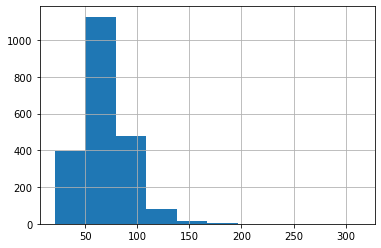

In [14]:
housing['LotFrontage'].hist()

<AxesSubplot:>

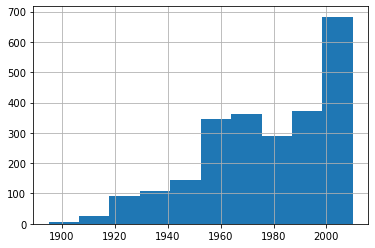

In [15]:
housing['GarageYrBlt'].hist()

#### The features are skewed, and there is a possible outlier for LotFrontage, so we will not be looking at that one observation.

In [157]:
lot= housing.loc[housing['LotFrontage'] < 300]

In [133]:
lot['LotFrontage'].skew() #NA values

0.6602702453109974

In [134]:
housing['LotFrontage'] = housing.groupby('MSSubClass')['LotFrontage'].apply(lambda x: x.replace(np.nan, round(x.median())))

In [136]:
lot['LotFrontage'].skew() #MSSubClass

0.5663009320439413

In [140]:
housing['LotFrontage'] = housing.groupby('MSZoning')['LotFrontage'].apply(lambda x: x.replace(np.nan, round(x.median())))

In [45]:
lot['LotFrontage'].skew() #MSZoning

0.6882542716502097

In [148]:
housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.replace(np.nan, round(x.median())))

In [150]:
lot['LotFrontage'].skew() #Neighborhood

0.6027138416339256

In [177]:
housing['LotFrontage'] = housing.groupby('BldgType')['LotFrontage'].transform(lambda x: x.replace(np.nan, round(x.median())))

In [117]:
lot['LotFrontage'].skew() #BldgType

0.658283374069896

In [152]:
housing['LotFrontage'] = housing.groupby('HouseStyle')['LotFrontage'].transform(lambda x: x.replace(np.nan, round(x.median())))

In [154]:
lot['LotFrontage'].skew() #HouseStyle

0.7090878817492564

In [156]:
housing['LotFrontage'] = housing.groupby('PavedDrive')['LotFrontage'].transform(lambda x: x.replace(np.nan, round(x.median())))

In [158]:
lot['LotFrontage'].skew() #PavedDrive

0.6974354866618904

#### The closest skew to the original is Building Type for LotFrontage

#### For GarageYrBlt, there were no obvious way of what feature to groupby, so we just went with the YearBuilt.

In [30]:
housing['GarageYrBlt'].skew() #NA's

-0.6348775500131778

In [182]:
housing['GarageYrBlt'] = housing.groupby('YearBuilt')['GarageYrBlt'].apply(lambda x: x.replace(np.nan, x.median()))
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(housing['YearBuilt'].median()) #3 extra NA values

In [183]:
housing['GarageYrBlt'] = round(housing['GarageYrBlt'])

In [185]:
housing['GarageYrBlt'].skew() #filled in

-0.581824406075528

#### Then we looked at the correlations of the features.

<AxesSubplot:>

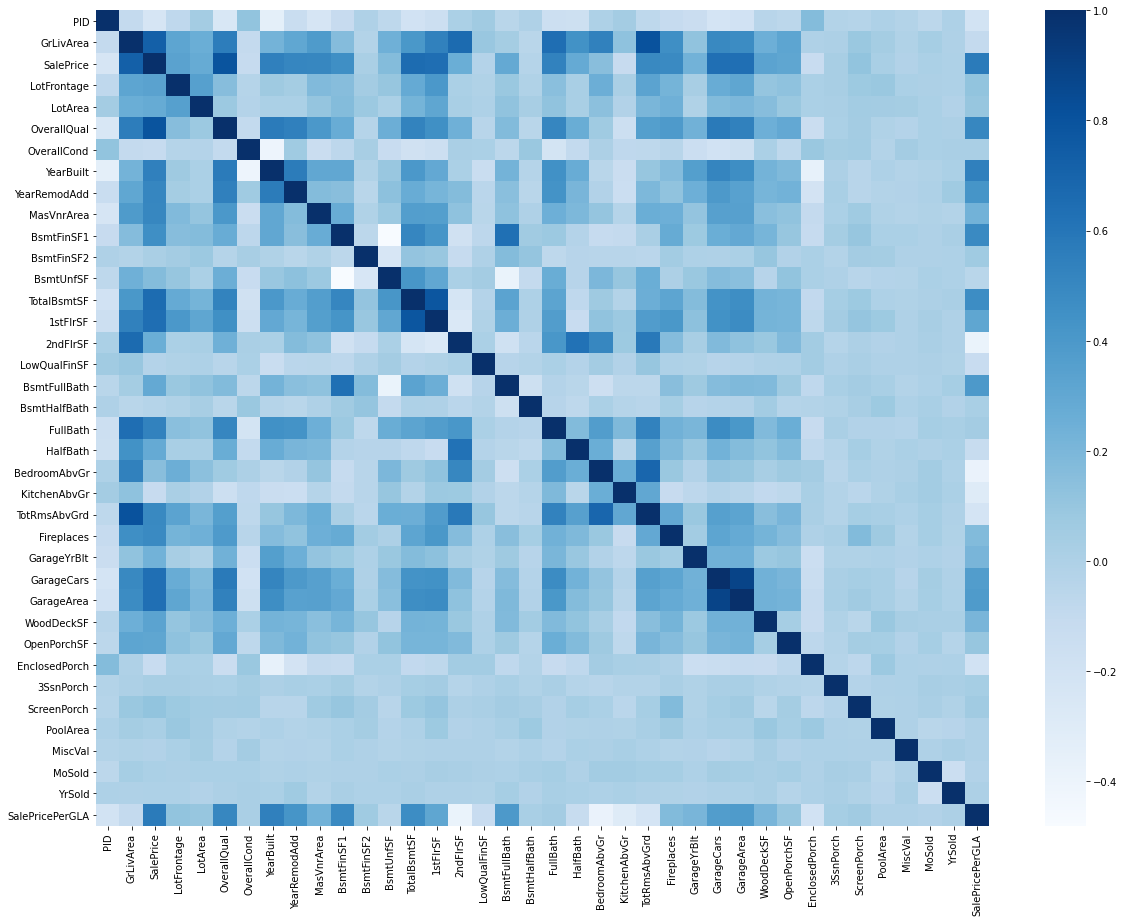

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(housing.corr(), cmap="Blues")

#### These are the top features that are heavily correlated to be aware of in avoiding multicollinearity. 

In [72]:
housing.corr().unstack().sort_values(ascending= False).drop_duplicates().head(20)

SalePricePerGLA  SalePricePerGLA    1.000000
GarageArea       GarageCars         0.889129
GrLivArea        TotRmsAbvGrd       0.806748
OverallQual      SalePrice          0.792510
TotalBsmtSF      1stFlrSF           0.783627
GrLivArea        SalePrice          0.723536
BedroomAbvGr     TotRmsAbvGrd       0.691686
GrLivArea        2ndFlrSF           0.663564
TotalBsmtSF      SalePrice          0.654793
FullBath         GrLivArea          0.645672
SalePrice        1stFlrSF           0.644983
                 GarageCars         0.640041
                 GarageArea         0.636669
BsmtFullBath     BsmtFinSF1         0.635159
HalfBath         2ndFlrSF           0.623710
2ndFlrSF         TotRmsAbvGrd       0.585331
OverallQual      GarageCars         0.580630
SalePricePerGLA  SalePrice          0.576109
OverallQual      YearBuilt          0.573229
YearBuilt        YearRemodAdd       0.569481
dtype: float64

#### These are correlations of the features to SalePrice and SalePrice per Gross Living Area.

In [73]:
housing.corr().unstack()['SalePrice'].sort_values(ascending= False).head(50)

SalePrice          1.000000
OverallQual        0.792510
GrLivArea          0.723536
TotalBsmtSF        0.654793
1stFlrSF           0.644983
GarageCars         0.640041
GarageArea         0.636669
SalePricePerGLA    0.576109
YearBuilt          0.543338
FullBath           0.536544
YearRemodAdd       0.512453
MasVnrArea         0.504225
TotRmsAbvGrd       0.494511
Fireplaces         0.490022
BsmtFinSF1         0.460731
LotFrontage        0.335278
WoodDeckSF         0.333844
OpenPorchSF        0.313747
BsmtFullBath       0.289044
HalfBath           0.287455
LotArea            0.278949
2ndFlrSF           0.263649
GarageYrBlt        0.235654
BsmtUnfSF          0.170397
BedroomAbvGr       0.154139
ScreenPorch        0.118871
3SsnPorch          0.030866
PoolArea           0.025825
BsmtFinSF2         0.020981
MoSold             0.012402
YrSold             0.001910
MiscVal           -0.016810
LowQualFinSF      -0.027831
BsmtHalfBath      -0.033741
OverallCond       -0.105018
KitchenAbvGr      -0

In [74]:
housing.corr().unstack()['SalePricePerGLA'].sort_values(ascending= False).head(50)

SalePricePerGLA    1.000000
SalePrice          0.576109
YearBuilt          0.548032
OverallQual        0.507225
BsmtFinSF1         0.485620
TotalBsmtSF        0.472776
YearRemodAdd       0.423569
BsmtFullBath       0.397293
GarageArea         0.386650
GarageCars         0.373462
1stFlrSF           0.313144
MasVnrArea         0.235606
WoodDeckSF         0.212244
GarageYrBlt        0.208342
Fireplaces         0.176767
LotFrontage        0.116804
LotArea            0.103341
OpenPorchSF        0.099345
BsmtFinSF2         0.064329
ScreenPorch        0.059362
FullBath           0.050515
3SsnPorch          0.035386
BsmtHalfBath       0.027105
OverallCond        0.018524
YrSold             0.009645
MiscVal           -0.002039
PoolArea          -0.005551
MoSold            -0.014470
BsmtUnfSF         -0.051978
GrLivArea         -0.104384
HalfBath          -0.119539
LowQualFinSF      -0.126220
EnclosedPorch     -0.194383
PID               -0.201626
TotRmsAbvGrd      -0.217076
KitchenAbvGr      -0

#### Visualizations of features compared to SalePrice.

In [75]:
housing_sp= housing[['GrLivArea','LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','GarageYrBlt', 'YearBuilt', 'YearRemodAdd','OverallQual', 'OverallCond', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSSubClass', 'MoSold', 'YrSold']]

housing_sp2= housing[['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSSubClass', 'MoSold', 'YrSold']]

In [85]:
x1= housing_sp.columns
x2= housing_sp2.columns
y= "SalePrice"
y1="SalePricePerGLA"

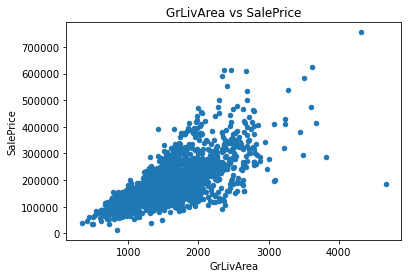

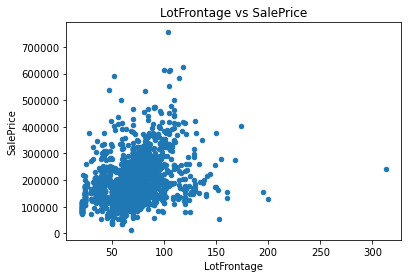

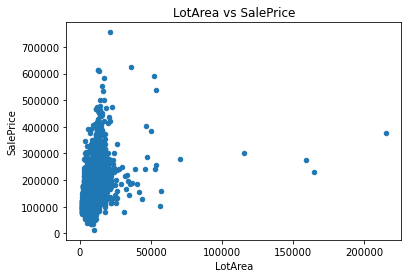

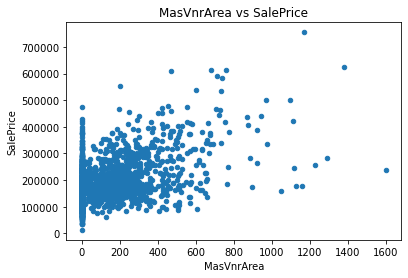

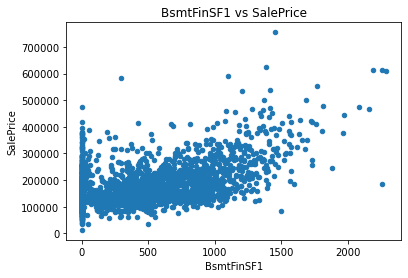

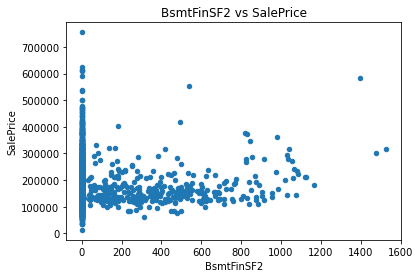

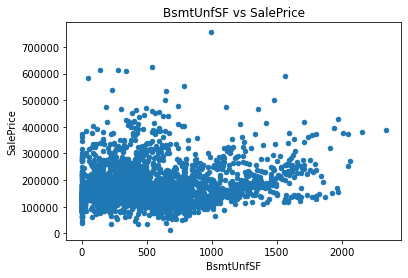

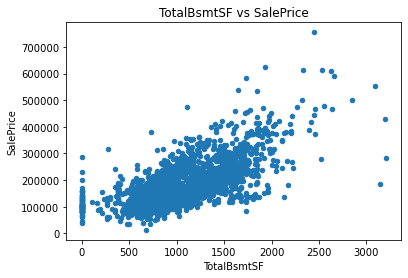

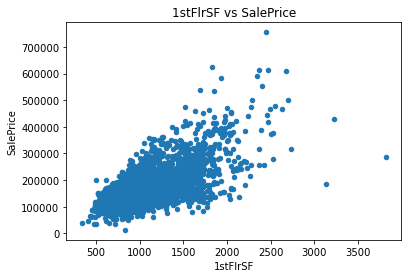

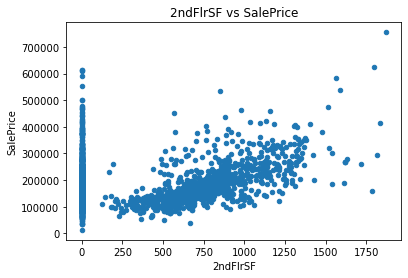

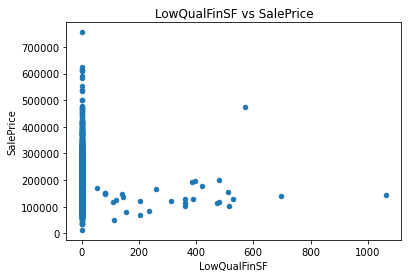

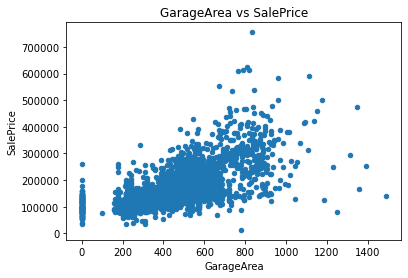

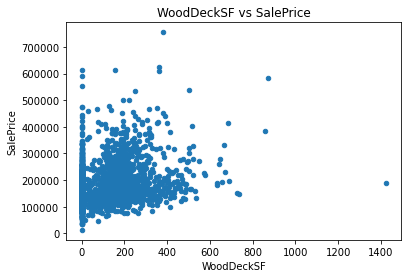

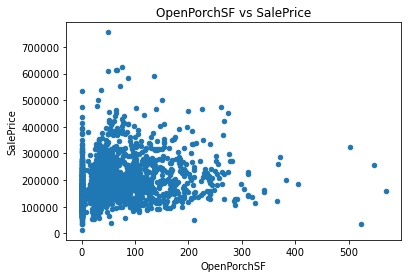

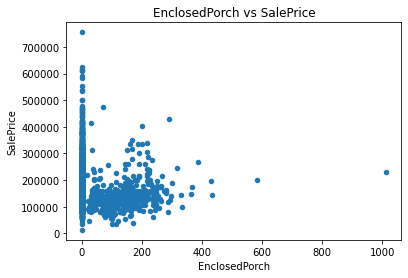

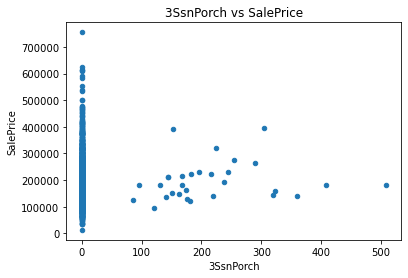

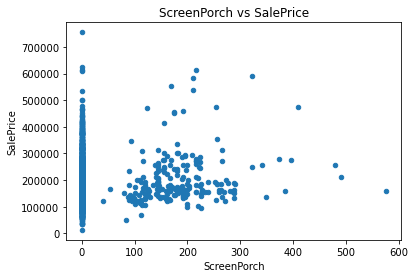

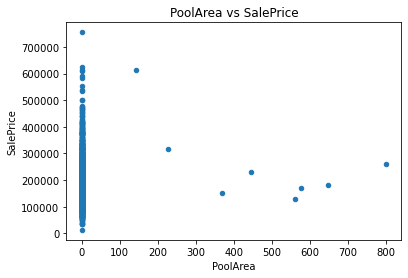

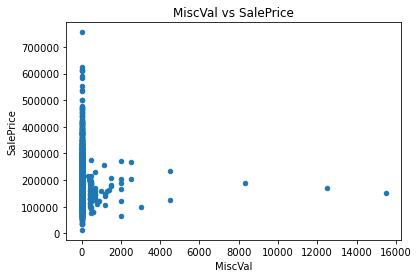

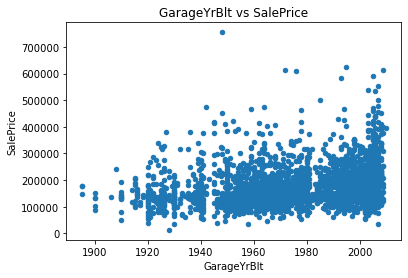

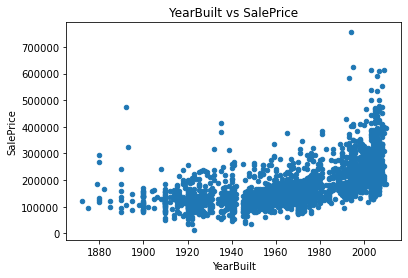

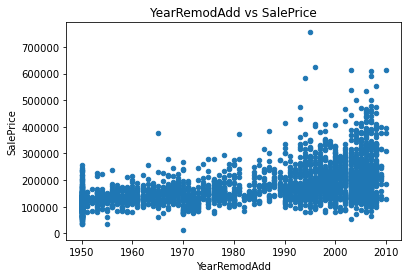

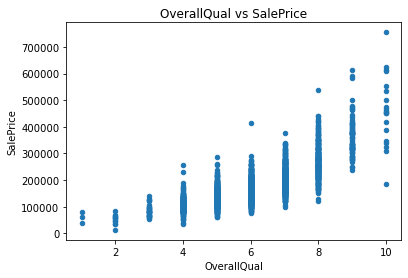

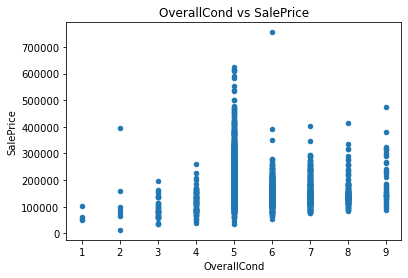

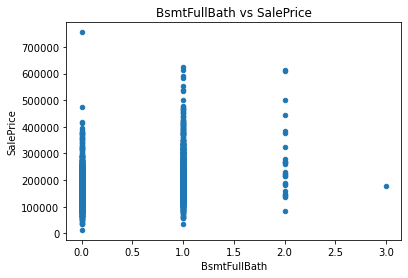

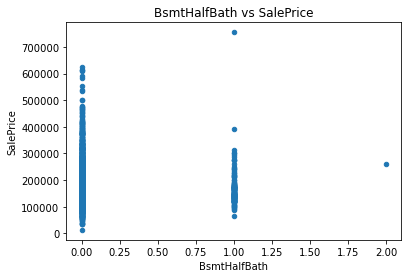

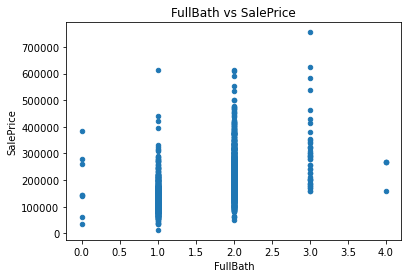

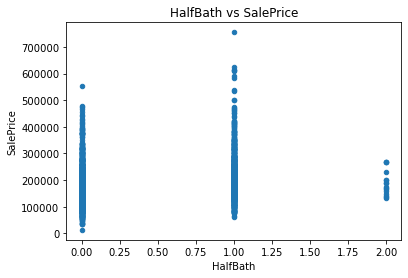

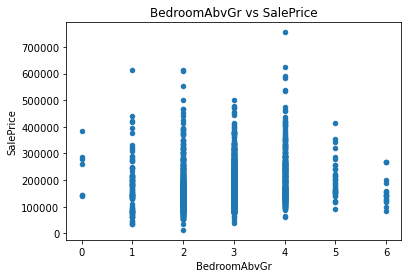

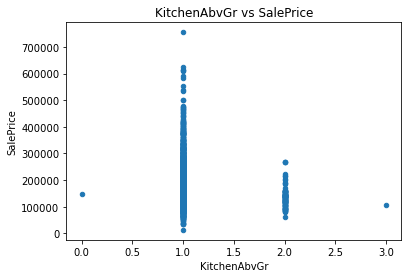

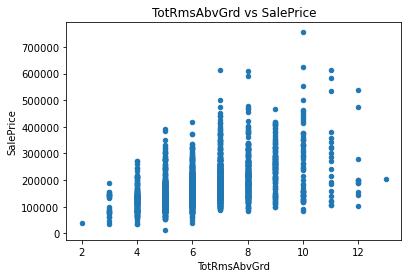

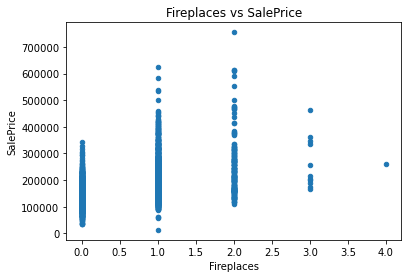

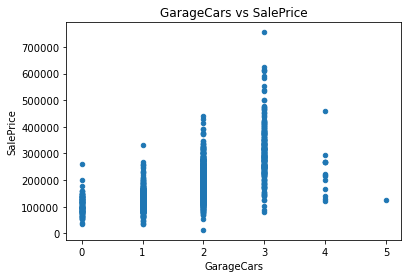

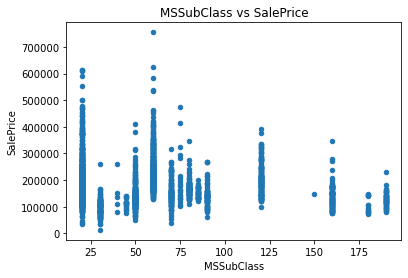

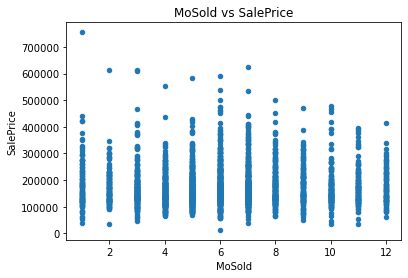

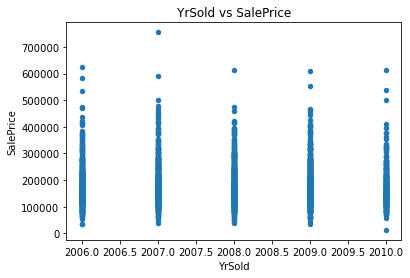

In [81]:
for col in x1:
    housing.plot.scatter(x=col,y=y, title= "{} vs {}".format(col, y))

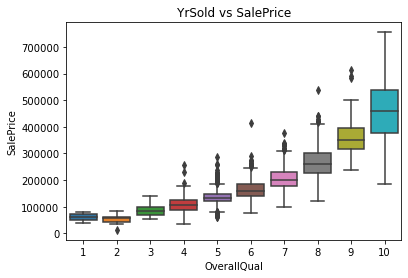

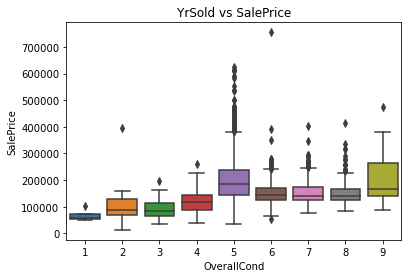

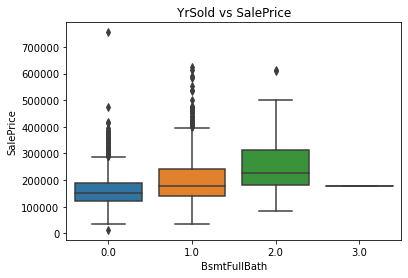

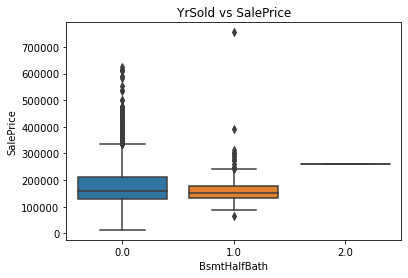

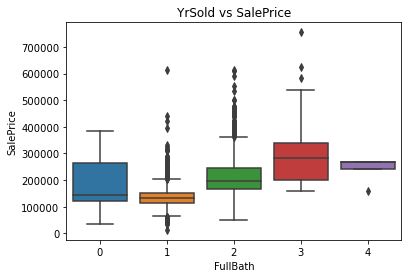

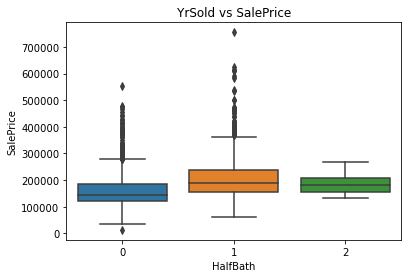

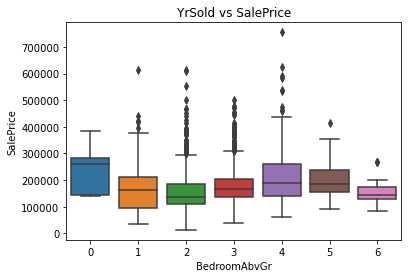

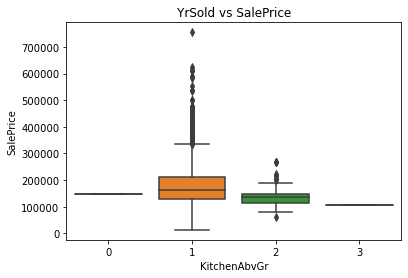

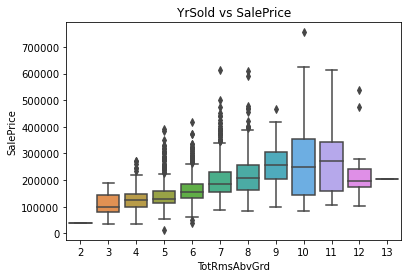

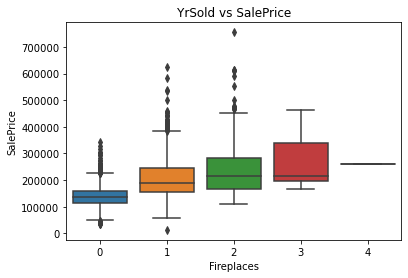

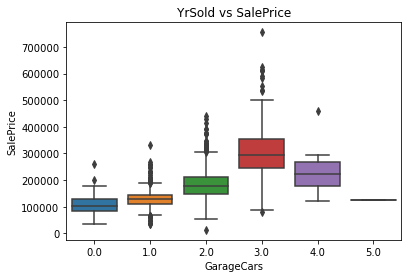

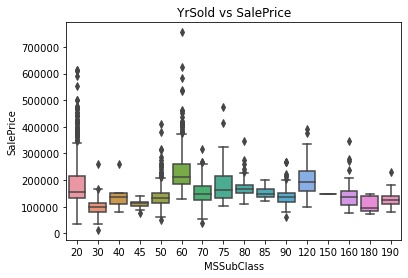

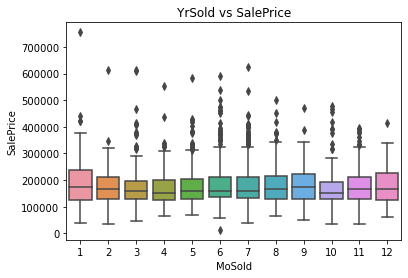

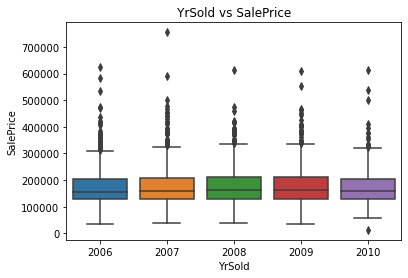

In [94]:
for x in x2:
    data = pd.concat([housing['SalePrice'], housing[x]], axis=1)
    ax = sns.boxplot(x=x, y=y, data=data).set_title("{} vs {}".format(col, y))  
    plt.show()

#### Visualizations of features compared to SalePrice per Gross Living Area. 

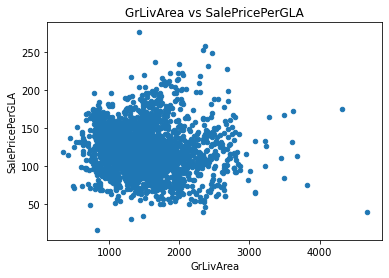

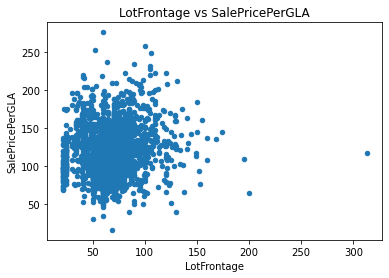

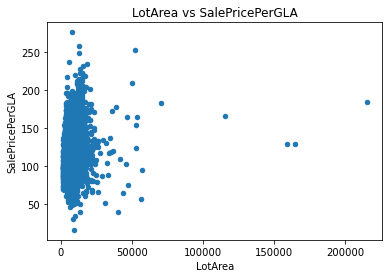

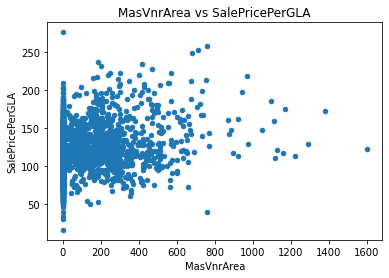

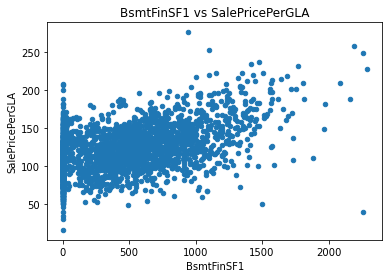

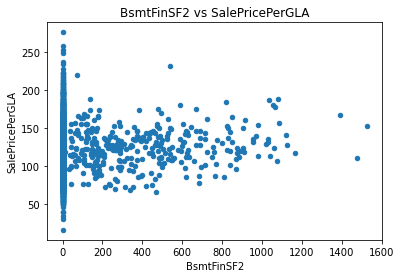

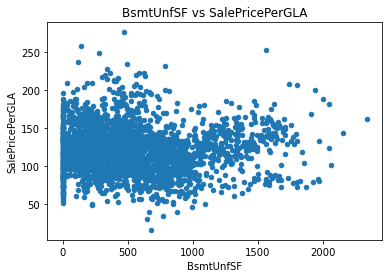

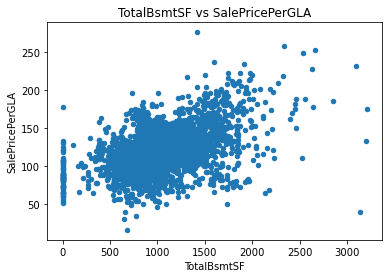

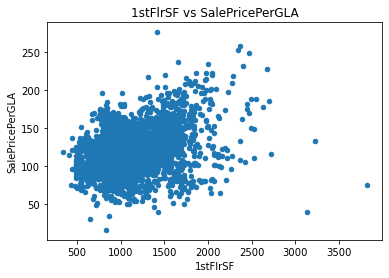

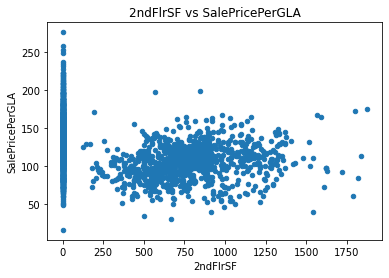

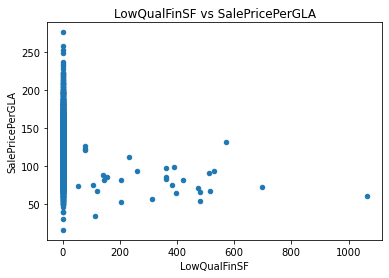

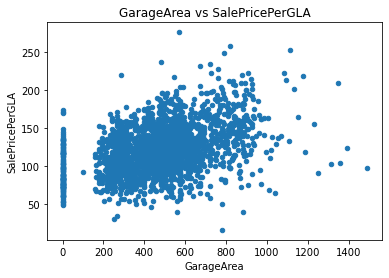

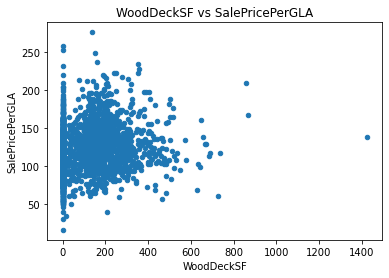

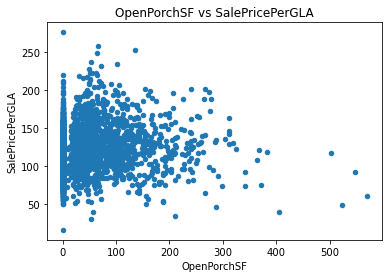

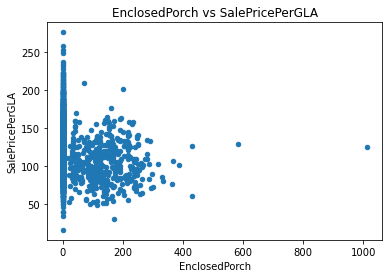

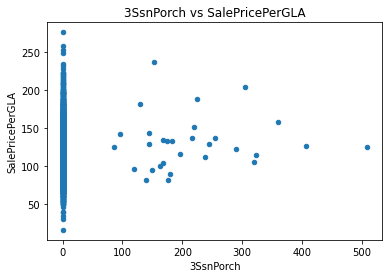

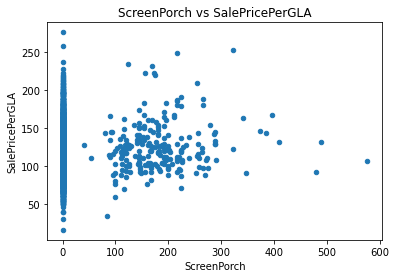

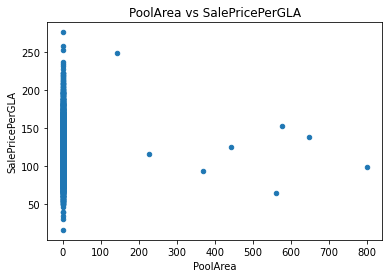

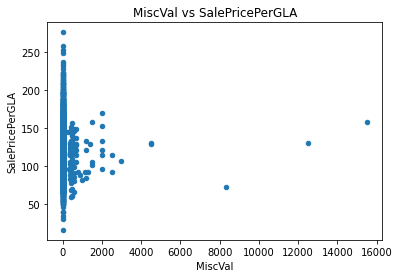

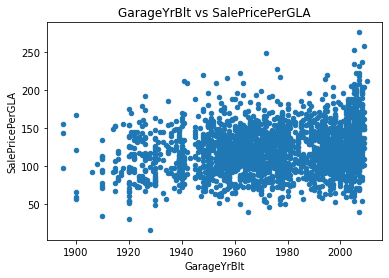

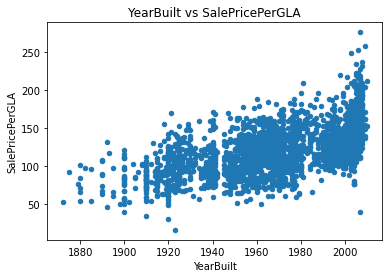

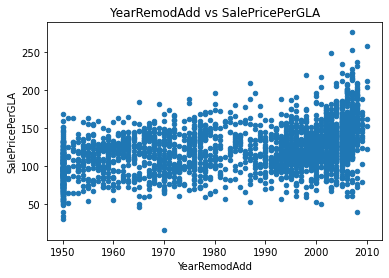

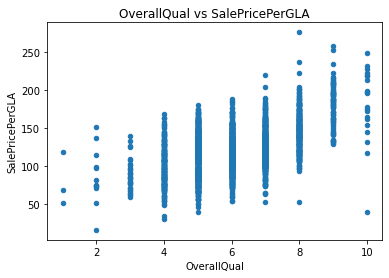

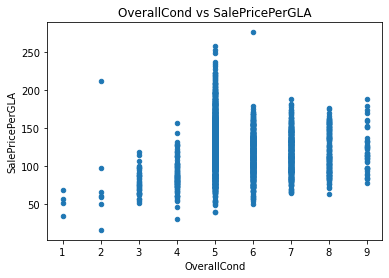

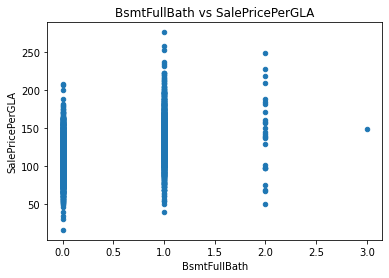

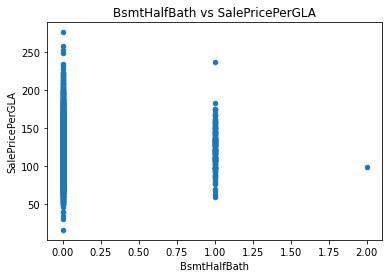

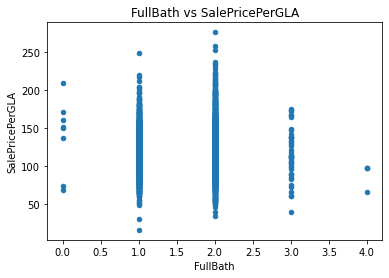

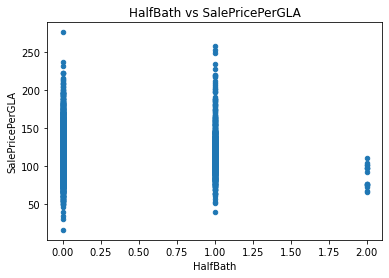

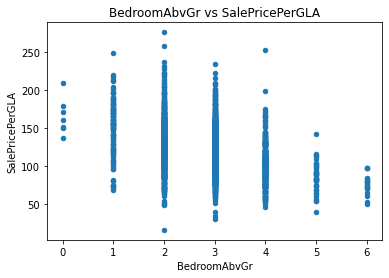

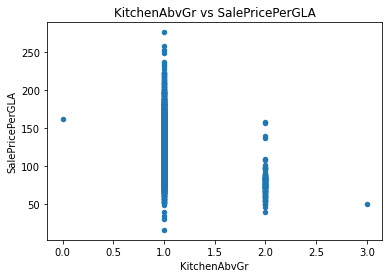

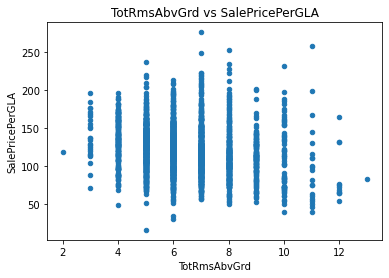

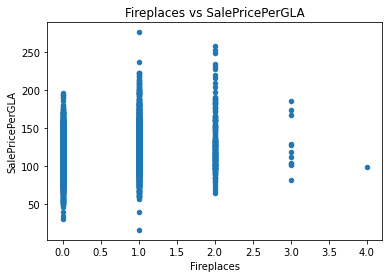

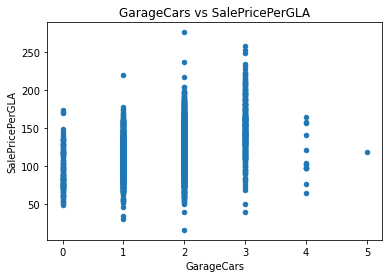

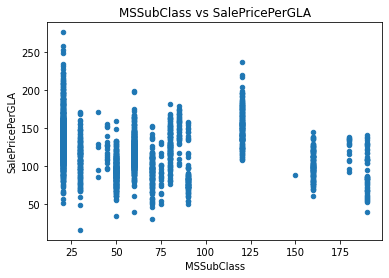

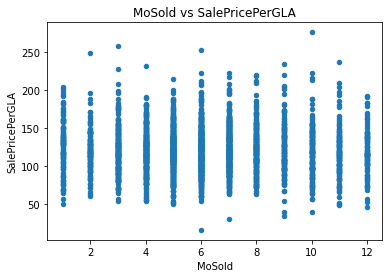

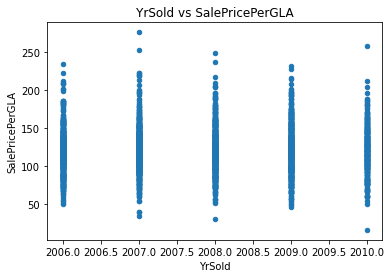

In [84]:
for col in x1:
    housing.plot.scatter(x=col,y=y1, title= "{} vs {}".format(col, y1))

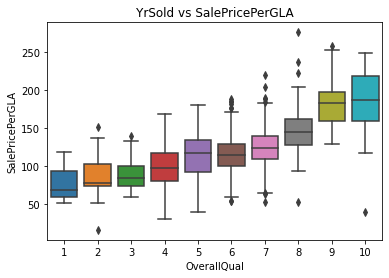

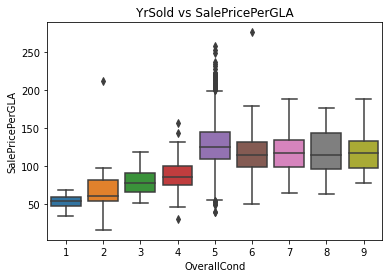

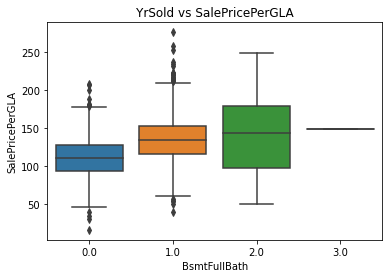

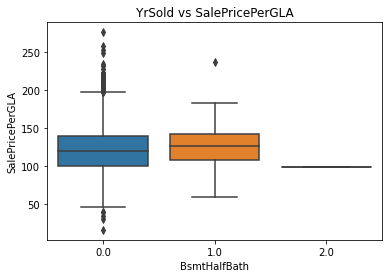

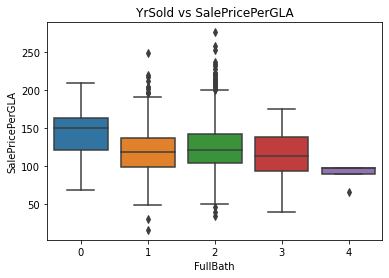

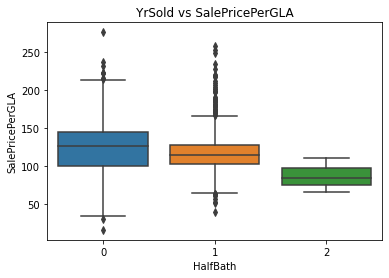

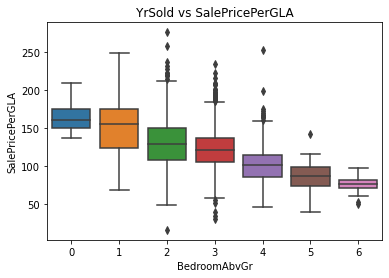

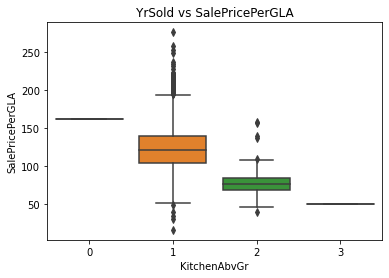

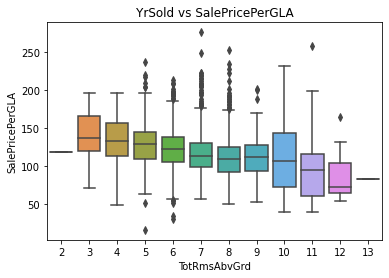

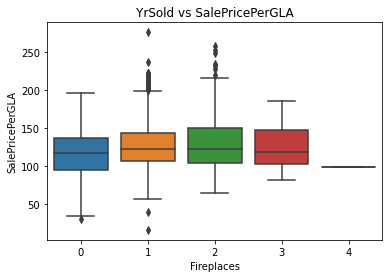

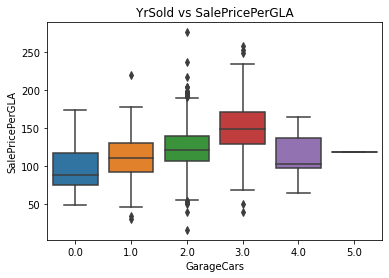

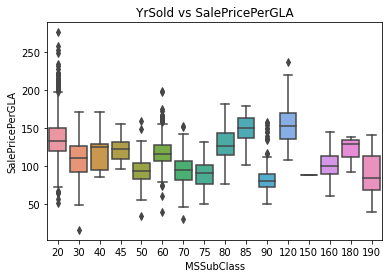

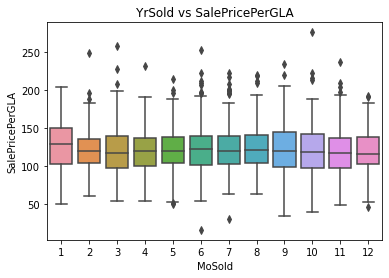

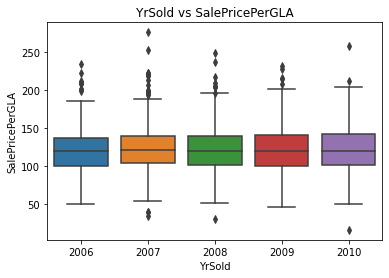

In [95]:
for x in x2:
    data = pd.concat([housing['SalePricePerGLA'], housing[x]], axis=1)
    ax = sns.boxplot(x=x, y=y1, data=data).set_title("{} vs {}".format(col, y1))    
    plt.show()

#### Some features had outliers, and some features did not have many observations, but we agreed to keep them at the moment, but will keep an eye on them.

In [184]:
housing.to_csv('Ames_Housing_Cleaned.csv')